In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import functions

#### Reading the data

In [2]:
data= pd.read_csv('data/transaction_dataset.csv')
data.head(2)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token


In [3]:
# There are A LOT of columns so I will create a NEW DataFrame with fewer columns and work from there.
# FLAG is target.

In [4]:
# Checking if there is CLASS IMBALANCE
data['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [5]:
# Let's see all COLUMNS first
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [6]:
data.head(1)
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [7]:
new_data = data.drop(columns = ['Unnamed: 0','Index','Address',' ERC20 most sent token type',' ERC20_most_rec_token_type',
                           ' ERC20 min val rec',' ERC20 max val rec',' ERC20 max val sent contract',' ERC20 min val sent contract',' ERC20 avg val sent contract',
                           ' ERC20 min val sent',' ERC20 max val sent','max val sent','min val sent','max value received ','min value received',
                           'max val sent to contract','min value sent to contract',' ERC20 avg time between sent tnx',
                            'avg value sent to contract','total ether sent contracts',
                           ' ERC20 avg time between rec tnx',' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx'],axis=1)

In [8]:
# Creating NEW DF with LESS COLUMNS
# new_data = data[['FLAG', 'Sent tnx', 'Received Tnx', 'avg val sent', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether balance', ' Total ERC20 tnxs', ' ERC20 max val sent']]

In [9]:
new_data.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,6.589513,1.200681,810,865.691093,586.466675,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,265586.147600,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.385685,0.032844,102,3.087297,3.085478,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,57.632615,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.358906,1.794308,12,3.588616,3.589057,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,65.189009,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,99.488840,70.001834,34,1750.045862,895.399559,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,1555.550174,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,2.671095,0.022688,4619,104.318883,53.421897,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,4934.232147,13726.659220,6.0,27.0


#### Checking for Null values

In [10]:
functions.nulls_percent(new_data)

,column_name,nulls_percentage
0,FLAG,0.000000
1,Avg min between sent tnx,0.000000
2,Avg min between received tnx,0.000000
3,Time Diff between first and last (Mins),0.000000
4,Sent tnx,0.000000
5,Received Tnx,0.000000
6,Number of Created Contracts,0.000000
7,Unique Received From Addresses,0.000000
8,Unique Sent To Addresses,0.000000
9,avg val received,0.000000


In [11]:
#new_data[' ERC20 max val sent'] = new_data[' ERC20 max val sent'].fillna(0)
#new_data[' ERC20 most sent token type'] = new_data[' ERC20 most sent token type'].fillna(0)

In [12]:
data_clean = new_data.dropna()
functions.nulls_percent(data_clean)

,column_name,nulls_percentage
0,FLAG,0.0
1,Avg min between sent tnx,0.0
2,Avg min between received tnx,0.0
3,Time Diff between first and last (Mins),0.0
4,Sent tnx,0.0
5,Received Tnx,0.0
6,Number of Created Contracts,0.0
7,Unique Received From Addresses,0.0
8,Unique Sent To Addresses,0.0
9,avg val received,0.0


#### Amount of Fraud and Non-Fraud Cases to check Class Imbalance

In [13]:
nofraud_count = data_clean['FLAG'].value_counts()[0]
print('Amount of Non Fraud Cases is:', nofraud_count)

fraud_count = data_clean['FLAG'].value_counts()[1]
print('Amount of Fraud Cases is:', fraud_count)

fraud_percentage = round(fraud_count/(nofraud_count + nofraud_count)*100, 2)
print('Fraud percentage is:', fraud_percentage)

Amount of Non Fraud Cases is: 7662
Amount of Fraud Cases is: 1350
Fraud percentage is: 8.81


<AxesSubplot:xlabel='FLAG', ylabel='count'>

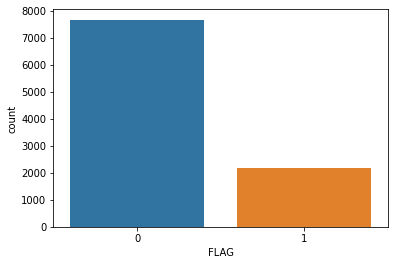

In [14]:
import seaborn as sns
%matplotlib inline
display(sns.countplot(x=data['FLAG']))

#### Distinction between Numerical and Categorical features

In [15]:
# Numerical columns
print('Numerical features:')
numerical = data_clean.select_dtypes(['number'])
display(numerical.head())

print('Categorical features:')
# Categorical columns
categorical = data_clean.select_dtypes(['object'])
display(categorical.head())
# I DON'T HAVE ANY CATEGORICALS

Numerical features:


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,6.589513,1.200681,810,865.691093,586.466675,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,265586.147600,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.385685,0.032844,102,3.087297,3.085478,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,57.632615,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.358906,1.794308,12,3.588616,3.589057,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,65.189009,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,99.488840,70.001834,34,1750.045862,895.399559,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,1555.550174,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,2.671095,0.022688,4619,104.318883,53.421897,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,4934.232147,13726.659220,6.0,27.0


Categorical features:


""
0
1
2
3
4


In [16]:
y = data_clean['FLAG']
X = data_clean.drop('FLAG', axis=1)

In [17]:
'''
import imblearn
import collections
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True) # fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))
'''

# Results look better with RandomOverSampler

"\nimport imblearn\nimport collections\nfrom collections import Counter\n\nfrom imblearn.under_sampling import RandomUnderSampler\n\nrus = RandomUnderSampler(random_state=42, replacement=True) # fit predictor and target variable\nX_rus, y_rus = rus.fit_resample(X, y)\n\nprint('original dataset shape:', Counter(y))\nprint('Resample dataset shape', Counter(y_rus))\n"

In [18]:

import imblearn
import collections
from collections import Counter

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42) # fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))



original dataset shape: Counter({0: 7662, 1: 1350})
Resample dataset shape Counter({0: 7662, 1: 7662})


In [19]:
'''
# Let's try with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
'''
# Results look better with RandomOverSampler

"\n# Let's try with SMOTE\nfrom imblearn.over_sampling import SMOTE\nfrom collections import Counter\n\nsmote = SMOTE()\n\n# fit predictor and target variable\nX_smote, y_smote = smote.fit_resample(X, y)\n\nprint('Original dataset shape', Counter(y))\nprint('Resample dataset shape', Counter(y_smote))\n"

In [20]:

display(X.shape)
display(y.shape)
print('______________')
display(y.shape)
display(y_ros.shape)
print('______________')
display(X_ros.shape)
display(y_ros.shape)


(9012, 26)

(9012,)

______________


(9012,)

(15324,)

______________


(15324, 26)

(15324,)

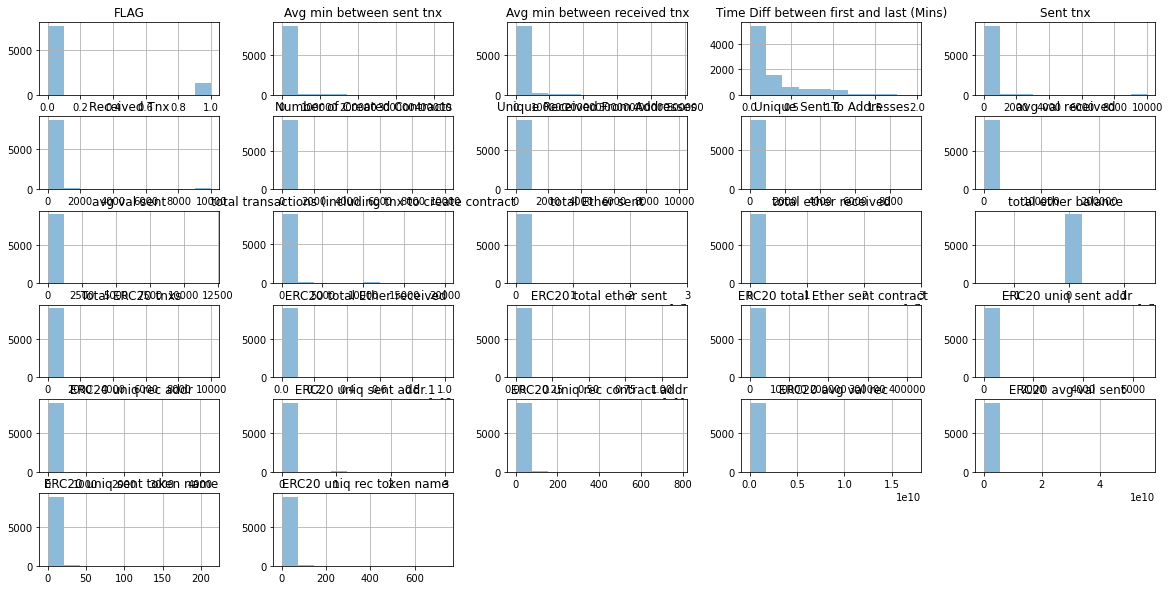

In [21]:
functions.plot_numericals(numerical)

#### Train/Test/Split

In [22]:
# y = data_clean['FLAG']
# X = data_clean.drop('FLAG', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=23) # stratify=data_clean.FLAG)

In [23]:
# display(X_train.shape)
# display(X_test.shape)

#### Scaling Numericals (train set)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
X_train_num = X_train.select_dtypes(include = np.number)
X_train_num


scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_num.columns)
X_train_scaled.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-1.004209,-1.229156,0.292907,-0.482188,-0.943518,-0.315063,-0.808411,-0.281409,1.081271,0.894662,-0.889530,0.175278,-0.079914,-0.003794,0.408749,1.085244,-0.397903,-0.038958,-0.423704,0.520543,-0.052737,0.508386,1.148622,-0.397916,-0.423623,0.509747
1,1.170368,0.274385,-0.230586,-0.066206,0.084265,-0.315063,0.535737,0.236510,0.021349,0.515132,-0.096544,0.148455,-0.107988,-0.003794,-0.086767,0.395486,-0.397903,-0.038958,-0.423704,-0.008762,-0.052737,-0.015835,0.590689,-0.397916,-0.423623,-0.015004
2,-1.004209,-1.229156,-1.626047,-1.374884,-1.678828,-0.315063,-1.848811,-1.458254,-1.283505,-1.140475,-1.869099,-1.220979,-1.459087,-0.003794,-0.086767,-0.481019,-0.397903,-0.038958,-0.423704,-0.008762,-0.052737,-0.015835,-0.392637,-0.397916,-0.423623,-0.015004
3,1.093305,0.808850,0.389244,0.608818,0.716396,-0.315063,0.647197,0.543981,-1.075551,-0.717365,0.525522,-0.423851,-0.690327,-0.003794,-1.271321,-1.012921,-0.397903,-0.038958,-0.423704,-1.286309,-0.052737,-1.281499,-1.025882,-0.397916,-0.423623,-1.281873
4,-1.004209,-1.229156,-1.234544,-0.482188,-0.943518,-0.315063,-0.808411,-0.281409,-1.160655,-1.048918,-0.889530,-1.170689,-1.411487,-0.003794,-1.271321,-1.012921,-0.397903,-0.038958,-0.423704,-1.286309,-0.052737,-1.281499,-1.025882,-0.397916,-0.423623,-1.281873


#### Normalizing Numericals (train set)

In [25]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
X_train_normalized = transformer.fit_transform(X_train_scaled)
X_train_normalized = pd.DataFrame(X_train_normalized, columns = X_train_scaled.columns)
X_train_normalized.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0.000000,0.000000,0.555766,0.253150,0.184974,0.0,0.224716,0.301964,0.730924,0.633292,0.223785,0.375945,0.314614,0.538632,0.485624,0.713829,0.0,0.0,0.0,0.496077,0.0,0.504952,0.726685,0.0,0.0,0.505193
1,0.780232,0.425487,0.404152,0.371114,0.443523,0.0,0.515039,0.434856,0.403315,0.515190,0.404946,0.368723,0.308210,0.538632,0.342395,0.479162,0.0,0.0,0.0,0.350755,0.0,0.357062,0.540233,0.0,0.0,0.357226
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538632,0.342395,0.180961,0.0,0.0,0.0,0.350755,0.0,0.357062,0.211621,0.0,0.0,0.357226
3,0.752582,0.576735,0.583667,0.562537,0.602542,0.0,0.539114,0.513750,0.064276,0.131663,0.547058,0.214628,0.175368,0.538632,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.113387,0.253150,0.184974,0.0,0.224716,0.301964,0.037972,0.028490,0.223785,0.013541,0.010858,0.538632,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


#### Scaling Numericals (test set)

In [26]:
X_test_num = X_test.select_dtypes(include = np.number)
# X_test_num.head()

scaler = PowerTransformer().fit(X_test_num)
X_test_scaled = scaler.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test_num.columns)
X_test_scaled.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0.806861,0.939415,1.482697,1.809408,1.645845,-0.320803,0.016264,0.781114,-0.812265,-0.766542,1.667270,0.920902,0.732586,0.004487,-0.063652,0.960455,-0.408439,-0.05368,-0.431096,0.017900,-0.065265,0.018295,1.163786,-0.408319,-0.430989,0.019232
1,-0.975058,-0.602367,0.203911,-0.452119,-0.566498,-0.320803,-0.298806,-0.244946,-0.551097,-0.238846,-0.651502,-0.680587,-0.952002,0.004467,-0.063652,0.380643,-0.408439,-0.05368,-0.431096,0.017900,-0.065265,0.018295,0.568741,-0.408319,-0.430989,0.019232
2,-0.391617,0.112578,-0.192313,-0.038884,1.025080,-0.320803,1.596542,-0.244946,-0.409466,1.056215,0.741012,0.604636,0.376103,0.004468,-0.063652,0.618836,-0.408439,-0.05368,-0.431096,0.017900,-0.065265,0.018295,0.819495,-0.408319,-0.430989,0.019232
3,-0.975058,-0.817776,0.847718,-0.452119,0.531185,-0.320803,0.965028,-0.244946,-0.279606,1.012579,0.229651,0.291725,0.037356,0.004467,0.717983,-0.288231,-0.408439,-0.05368,-0.431096,0.848514,-0.065265,0.844051,-0.584872,-0.408319,-0.430989,0.846037
4,-0.975058,0.998708,1.004433,-1.343808,1.213798,3.117154,0.239653,-1.429664,-0.529728,-1.139642,0.935069,-1.217120,0.472637,0.007680,0.433149,-0.555056,-0.408439,-0.05368,-0.431096,0.547575,-0.065265,0.545286,-0.693245,-0.408319,-0.430989,0.546877


#### Normalizing Numericals (test set)

In [27]:
transformer = MinMaxScaler().fit(X_test_scaled)
X_test_normalized = transformer.transform(X_test_scaled)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = X_test_scaled.columns)
X_test_normalized.head()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0.645347,0.643606,0.902539,0.911814,0.830682,0.000000,0.403906,0.578890,0.146158,0.117021,0.810733,0.579395,0.502787,0.602906,0.346605,0.672743,0.0,0.0,0.0,0.358739,0.0,0.364756,0.734357,0.0,0.0,0.364861
1,0.000000,0.184650,0.530314,0.257849,0.277174,0.000000,0.335437,0.310217,0.227059,0.282531,0.276268,0.145398,0.117736,0.602906,0.346605,0.474881,0.0,0.0,0.0,0.358739,0.0,0.364756,0.534623,0.0,0.0,0.364861
2,0.211301,0.397474,0.414983,0.377344,0.675372,0.000000,0.747320,0.310217,0.270931,0.688721,0.597235,0.493689,0.421305,0.602906,0.346605,0.556165,0.0,0.0,0.0,0.358739,0.0,0.364756,0.618792,0.0,0.0,0.364861
3,0.000000,0.120527,0.717712,0.257849,0.551804,0.000000,0.610084,0.310217,0.311157,0.675035,0.479369,0.408891,0.343876,0.602906,0.573506,0.246627,0.0,0.0,0.0,0.589410,0.0,0.598295,0.147400,0.0,0.0,0.598504
4,0.000000,0.661257,0.763328,0.000000,0.722588,0.999862,0.452451,0.000000,0.233678,0.000000,0.641964,0.000000,0.443370,0.602961,0.490822,0.155573,0.0,0.0,0.0,0.505836,0.0,0.513798,0.111024,0.0,0.0,0.513966


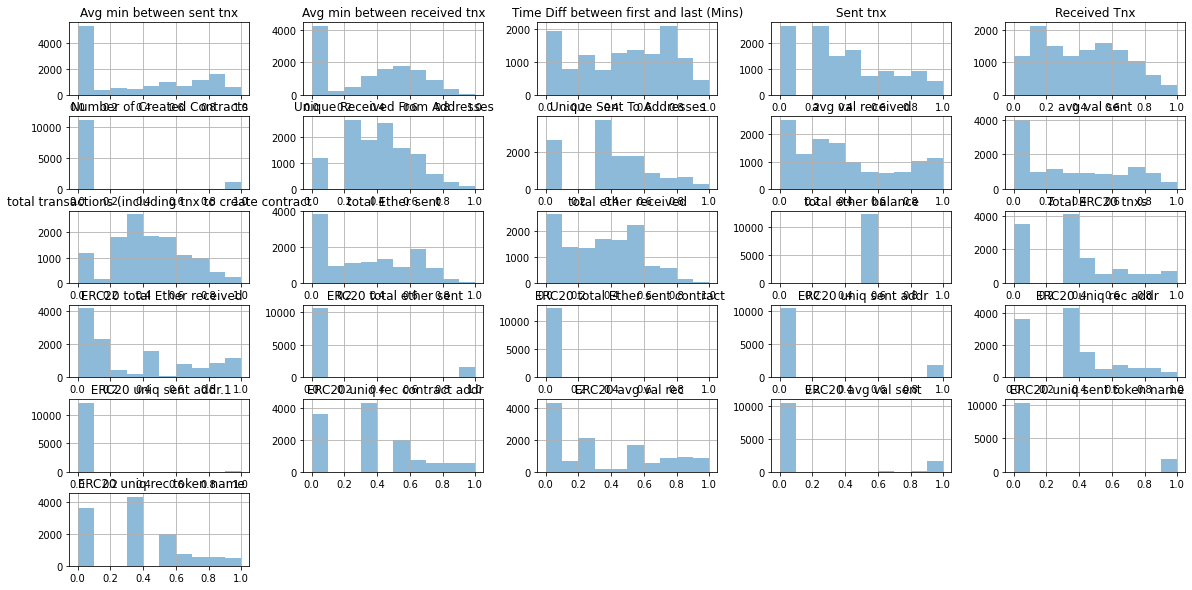

In [28]:
functions.plot_numericals(X_train_normalized)

In [29]:
X_train = X_train_normalized
display(X_train_normalized)
display(X_train_normalized.shape)

X_test = X_test_normalized
display(X_test_normalized)
display(X_test_normalized.shape)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0.000000,0.000000,0.555766,0.253150,0.184974,0.0,0.224716,0.301964,0.730924,0.633292,0.223785,0.375945,0.314614,0.538632,0.485624,0.713829,0.0,0.0,0.0,0.496077,0.0,0.504952,0.726685,0.0,0.0,0.505193
1,0.780232,0.425487,0.404152,0.371114,0.443523,0.0,0.515039,0.434856,0.403315,0.515190,0.404946,0.368723,0.308210,0.538632,0.342395,0.479162,0.0,0.0,0.0,0.350755,0.0,0.357062,0.540233,0.0,0.0,0.357226
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538632,0.342395,0.180961,0.0,0.0,0.0,0.350755,0.0,0.357062,0.211621,0.0,0.0,0.357226
3,0.752582,0.576735,0.583667,0.562537,0.602542,0.0,0.539114,0.513750,0.064276,0.131663,0.547058,0.214628,0.175368,0.538632,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.113387,0.253150,0.184974,0.0,0.224716,0.301964,0.037972,0.028490,0.223785,0.013541,0.010858,0.538632,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12254,0.000000,0.221917,0.420954,0.253150,0.278305,0.0,0.332955,0.301964,0.314518,0.364251,0.274983,0.192243,0.156544,0.538632,0.342395,0.180961,0.0,0.0,0.0,0.350755,0.0,0.357062,0.211621,0.0,0.0,0.357226
12255,0.886318,0.649422,0.569206,0.371114,0.278305,0.0,0.332955,0.434856,0.368217,0.293091,0.312789,0.222457,0.181938,0.538632,0.342395,0.180961,0.0,0.0,0.0,0.350755,0.0,0.357062,0.211621,0.0,0.0,0.357226
12256,0.871303,0.447829,0.573899,0.443684,0.640376,0.0,0.677111,0.513750,0.268924,0.576301,0.564103,0.454202,0.382865,0.538632,0.485624,0.821660,0.0,0.0,0.0,0.496077,0.0,0.504952,0.844211,0.0,0.0,0.505193
12257,0.000000,0.372711,0.475918,0.253150,0.382356,0.0,0.449132,0.301964,0.329592,0.499993,0.342497,0.278488,0.229560,0.538632,0.342395,0.180961,0.0,0.0,0.0,0.350755,0.0,0.357062,0.211621,0.0,0.0,0.357226


(12259, 26)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg val rec,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0.645347,0.643606,0.902539,0.911814,0.830682,0.000000,0.403906,0.578890,0.146158,0.117021,0.810733,0.579395,0.502787,0.602906,0.346605,0.672743,0.0,0.0,0.0,0.358739,0.0,0.364756,0.734357,0.0,0.0,0.364861
1,0.000000,0.184650,0.530314,0.257849,0.277174,0.000000,0.335437,0.310217,0.227059,0.282531,0.276268,0.145398,0.117736,0.602906,0.346605,0.474881,0.0,0.0,0.0,0.358739,0.0,0.364756,0.534623,0.0,0.0,0.364861
2,0.211301,0.397474,0.414983,0.377344,0.675372,0.000000,0.747320,0.310217,0.270931,0.688721,0.597235,0.493689,0.421305,0.602906,0.346605,0.556165,0.0,0.0,0.0,0.358739,0.0,0.364756,0.618792,0.0,0.0,0.364861
3,0.000000,0.120527,0.717712,0.257849,0.551804,0.000000,0.610084,0.310217,0.311157,0.675035,0.479369,0.408891,0.343876,0.602906,0.573506,0.246627,0.0,0.0,0.0,0.589410,0.0,0.598295,0.147400,0.0,0.0,0.598504
4,0.000000,0.661257,0.763328,0.000000,0.722588,0.999862,0.452451,0.000000,0.233678,0.000000,0.641964,0.000000,0.443370,0.602961,0.490822,0.155573,0.0,0.0,0.0,0.505836,0.0,0.513798,0.111024,0.0,0.0,0.513966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,0.598067,0.394089,0.420308,0.377344,0.683970,0.000000,0.747320,0.445294,0.232423,0.668368,0.605505,0.478137,0.407285,0.602906,0.490822,0.952244,0.0,0.0,0.0,0.505836,0.0,0.513798,0.966121,0.0,0.0,0.513966
3061,0.542732,0.608929,0.620648,0.450605,0.647327,0.000000,0.688225,0.524954,0.315486,0.621585,0.574573,0.486165,0.420728,0.602910,0.667916,0.671951,0.0,0.0,0.0,0.683995,0.0,0.693722,0.581532,0.0,0.0,0.693985
3062,0.000000,0.444662,0.516662,0.257849,0.515872,0.000000,0.543066,0.310217,0.228093,0.564736,0.448590,0.323717,0.268607,0.602906,0.346605,0.238214,0.0,0.0,0.0,0.358739,0.0,0.364756,0.276198,0.0,0.0,0.364861
3063,0.508176,0.897209,0.704075,0.377344,0.277174,0.000000,0.335437,0.445294,0.204735,0.160497,0.314267,0.131882,0.106903,0.602906,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


(3065, 26)

In [30]:
# Let's try SMOTE to deal with CLASS IMBALANCE and get better results
#from imblearn.over_sampling import SMOTE

#### Prediction with Logistic Regression Model

In [31]:
# Prediction with a Logistic Regression Model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=23, solver='lbfgs')
lr.fit(X_train, y_train)
lr_yhat_train = lr.predict(X_train)
lr_yhat_test = lr.predict(X_test)

/Users/mariasoriano/Documents/data_jul/fraud_vehicle_insurance/fraud_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Metrics for the Models

In [32]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay

The accuracy in the TEST set is: 0.93
The precision in the TEST set is: 0.93
The recall in the TEST set is: 0.94
The F1 in the TEST set is: 0.93
The Kappa in the TEST set is: 0.86


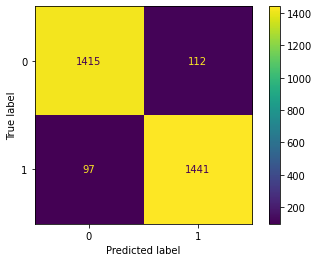

In [33]:
functions.plot_results(y_test, lr_yhat_test)
# Results aren't good in general... Kappa is VERY LOW.
# BUT they are BETTER than before (with CLASS IMBALANCE)
# Will continue working on this maybe adding some more data (cols that I left out at first) to see if the MODEL PREDICTS BETTER